Лабораторна робота №2

Студента групи МІТ-31 (підгрупа 2)

Фуркала Олександра Олександровича

Завдання 1

Mean Squared Error (MSE): 0.011431505049610586
R-squared (R2) Score: 0.9999988004403149


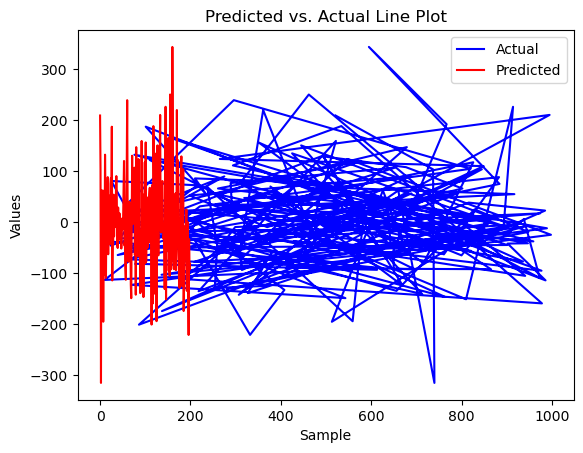

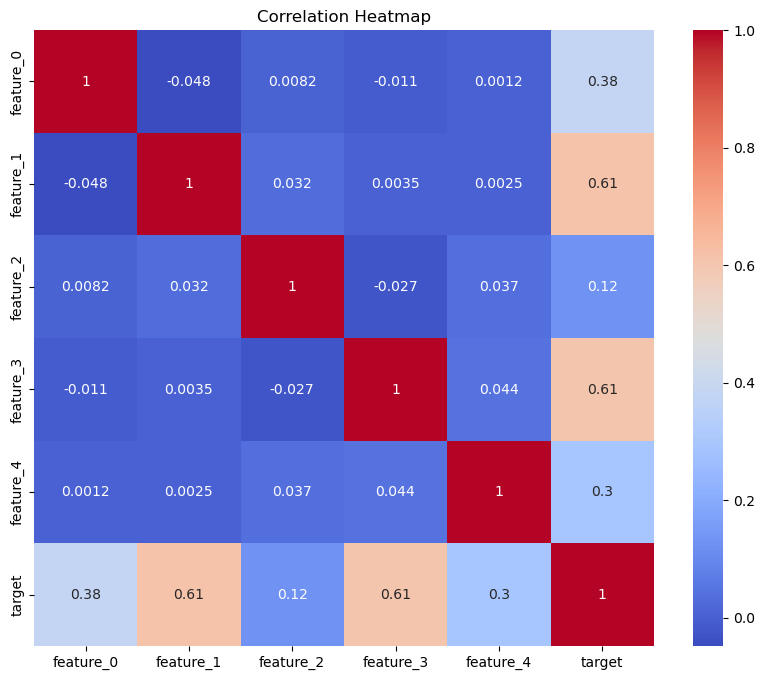

In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

samples = 1000
features = 5
X, y = make_regression(n_samples=samples, n_features=features, noise=0.1)
#Використовується для створення наборів синтетичних регресійних даних. 
#Він створює набір даних із випадковими функціями та лінійним зв’язком між функціями та цільовою змінною.
#"noise" контролює кількість випадкового шуму, який потрібно додати до цільових значень.
#У цьому випадку встановлено значення 0,1, 
#що означає, що до цільової змінної додається невелика кількість випадкового шуму (10% дисперсії).
#"X" міститиме значення ознак (незалежні змінні), а "y" міститиме цільові значення (залежна змінна).
data = pd.DataFrame(data=X, columns=[f'feature_{i}' for i in range(features)])
#columns=[f'feature_{i}' for i in range(features)] вказує назви стовпців
data['target'] = y
data.to_csv('full_data_lab2.csv')

X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)
#data.drop використовується для відділення ознак (незалежних змінних) від цільової змінної (залежної змінної)
#Фактично створює DataFrame, що містить лише стовпці функцій.
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

plt.plot(y_test, label="Actual", color='blue')
plt.plot(y_pred, label="Predicted", color='red')
plt.xlabel("Sample")
plt.ylabel("Values")
plt.legend()
plt.title("Predicted vs. Actual Line Plot")
plt.show()

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Завдання 2

            Daily minimum temperatures
Date                                  
1981-01-01                        20.7
1981-01-02                        17.9
1981-01-03                        18.8
1981-01-04                        14.6
1981-01-05                        15.8
...                                ...
1990-12-27                        14.0
1990-12-28                        13.6
1990-12-29                        13.5
1990-12-30                        15.7
1990-12-31                        13.0

[3652 rows x 1 columns]
       Daily minimum temperatures
count                 3650.000000
mean                    11.185973
std                      4.060078
min                      0.000000
25%                      8.300000
50%                     11.000000
75%                     14.000000
max                     26.300000


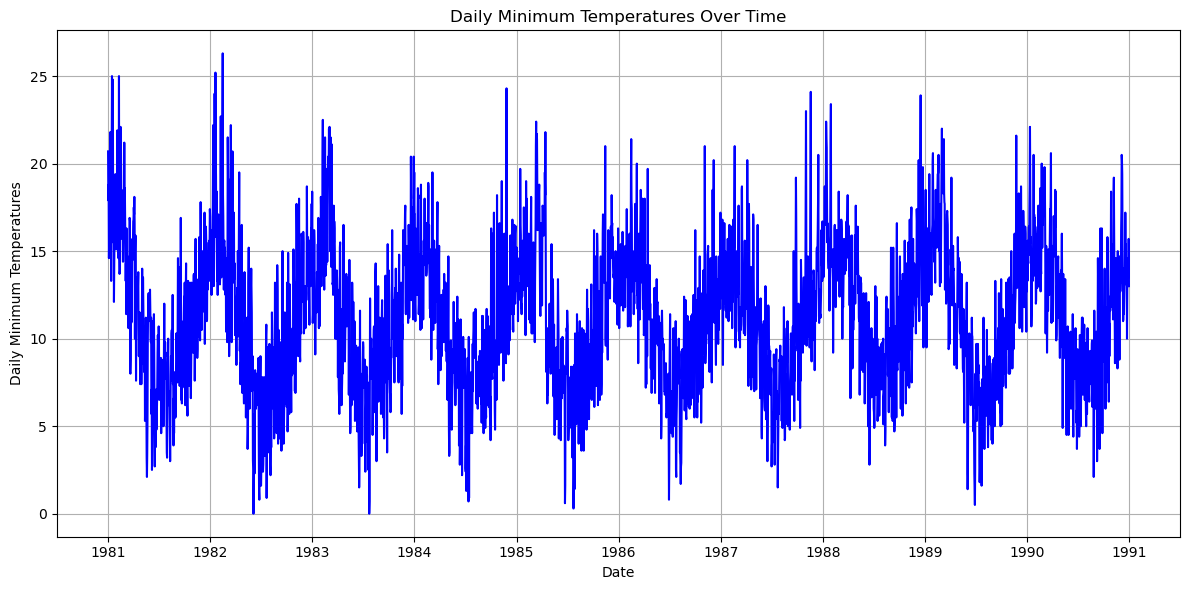

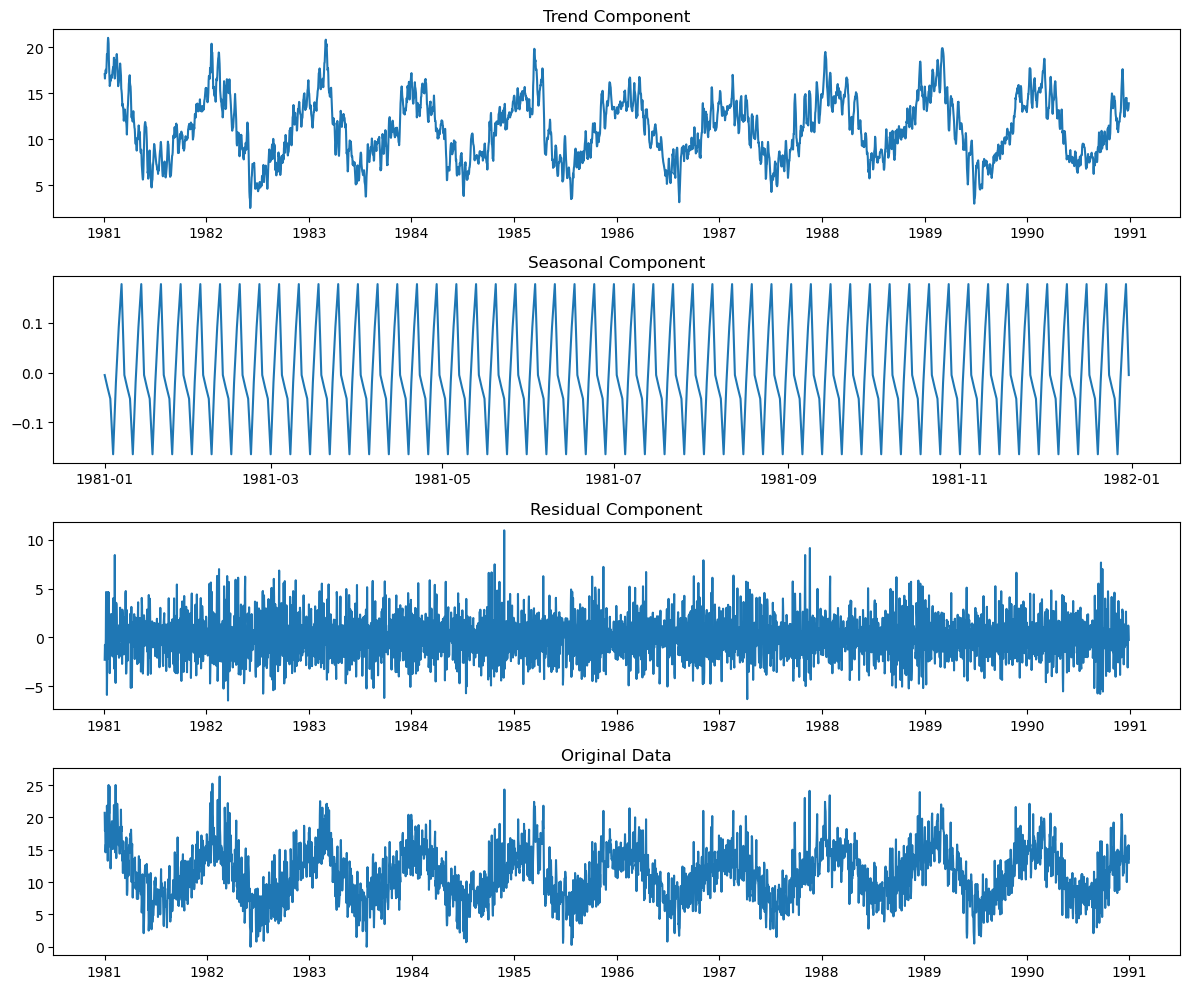

<Figure size 1200x600 with 0 Axes>

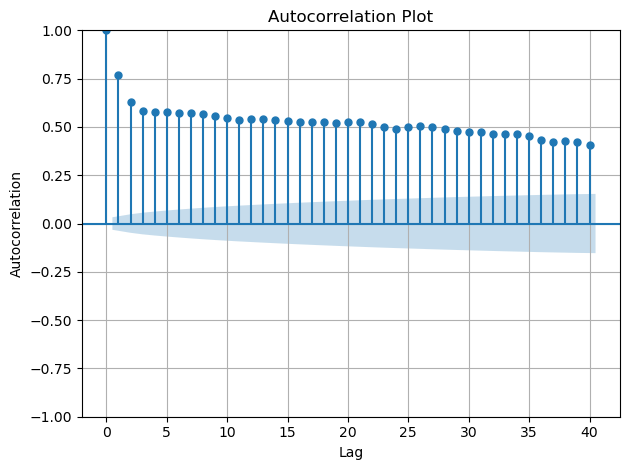

<Figure size 1200x600 with 0 Axes>

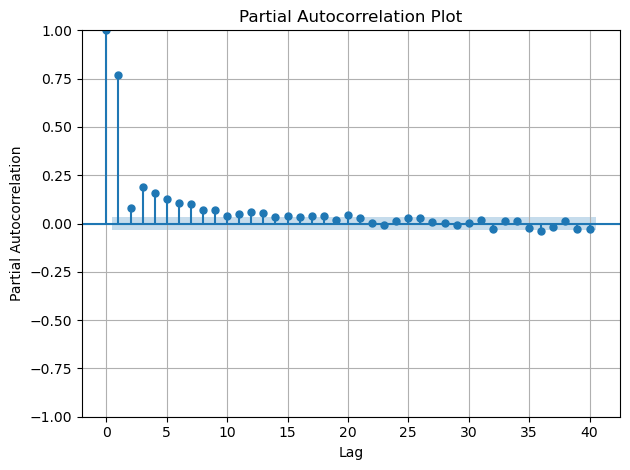

                                     SARIMAX Results                                      
Dep. Variable:         Daily minimum temperatures   No. Observations:                 3652
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 30)   Log Likelihood               -9484.551
Date:                            Sat, 14 Oct 2023   AIC                          18975.101
Time:                                    16:36:28   BIC                          18993.685
Sample:                                01-01-1981   HQIC                         18981.722
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1915      0.015    -12.563      0.000      -0.221      -0.162
ar.S.L30      -0.5036      0.014   

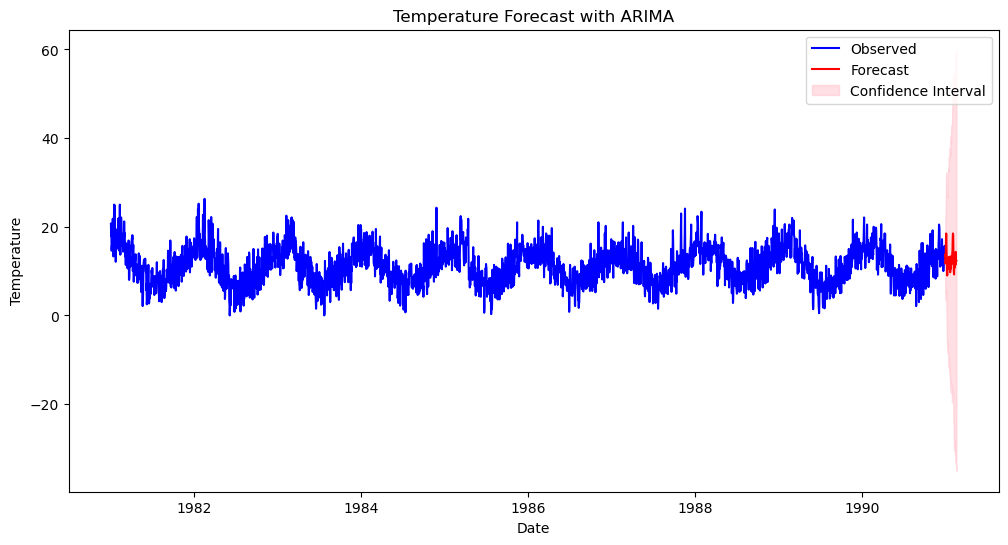

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_csv('daily-minimum-temperatures-in-me.csv', parse_dates=['Date'], index_col='Date')
#Параметр parse_dates використовується для перетворення стовпця "Дата" на тип даних datetime
#index_col встановлює стовпець "Дата" як індекс DataFrame.
df = df.asfreq('D')
#Метод asfreq у Pandas використовується для зміни частоти часових рядів. 
#Використовується для повторної вибірки даних, щоб дані часових рядів відповідали щоденній (daily, 'D') частоті.
#Буде потрібно для decomposition
print(df)
summary = df.describe()
#використовується для генерації описової статистики DataFrame або Series
#(кількість, середнє значення, стандартне відхилення, мінімальне та максимальне значення).
print (summary)

plt.figure(figsize=(12, 6))  
plt.plot(df.index, df['Daily minimum temperatures'], linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Daily Minimum Temperatures')
plt.title('Daily Minimum Temperatures Over Time')
plt.grid(True)
plt.tight_layout()  
plt.show()

df['Daily minimum temperatures'].fillna(method='ffill', inplace=True)
# Використовується для заповнення відсутніх (NaN) значень у DataFrame або Series зазначеними значеннями.
#У цьому випадку використовується method='ffill', що означає "пряме заповнення". 
#Під час використання прямого заповнення він заповнює відсутні значення 
#попереднім доступним (не нульовим) значенням у стовпці.
# Для параметра inplace встановлено значення True, 
#що означає, що операція застосовується безпосередньо до DataFrame df без створення нового DataFrame. 
 
decomposition = seasonal_decompose(df['Daily minimum temperatures'], model='additive')
# Використовується для виконання сезонної декомпозиції часового ряду.
# Після виконання decomposition міститиме трендові, сезонні та залишкові компоненти часового ряду.
# Seasonal_decompose розкладає часовий ряд на три основні компоненти: trend, seasonality, residual.
# Trend: представляє основну тенденцію або довгострокову поведінку даних. 
#Так виглядали б дані, якби не було сезонних чи короткострокових коливань.
# Seasonality: Це фіксує періодичні, повторювані моделі в даних. 
#Це допомагає визначити сезонність, наприклад щоденні, тижневі або річні моделі.
# Residual: Це те, що залишається після прибирання трендової та сезонної складових.
#Представляє випадкові або нерегулярні коливання даних.
# Additive = дані моделюються як сума трендових, сезонних і залишкових компонентів.
plt.figure(figsize=(12, 10))
plt.subplot(411)
# Підсхеми дозволяють відображати кілька графіків або діаграм на одному малюнку.
#4 вказує, що є 4 рядки підділянок, а 1 вказує, що є лише 1 стовпець підділянок.
#Остання цифра - індекс конкретного підсхеми
plt.plot(decomposition.trend)
plt.title('Trend Component')
plt.subplot(412)
start_date = '1981-01-01'
end_date = '1981-12-31' 
# Взяли ці дати для того, щоб результат був наочнішим
seasonal_component = decomposition.seasonal[start_date:end_date]
plt.plot(seasonal_component)
plt.title('Seasonal Component')
plt.subplot(413)
plt.plot(decomposition.resid)
plt.title('Residual Component')
plt.subplot(414)
plt.plot(df['Daily minimum temperatures'])
plt.title('Original Data')
plt.tight_layout()
# Використовується для автоматичного коригування інтервалу між підсхемами,
#щоб вони добре вписувалися в фігуру, уникаючи накладання або надмірного білого простору.
plt.show()

plt.figure(figsize=(12, 6))
plot_acf(df['Daily minimum temperatures'], lags=40) 
# Використовується для створення графіка функції автокореляції (ACF) для заданого часового ряду. 
# Параметр lags використовується для вказівки кількості затримок, які хочемо включити до діаграми ACF.
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Daily minimum temperatures'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

#p = 4 AR order, Авторегресійний порядок
#d = 1  Differencing order, Різниця порядку
#q = 0  # MA order, Порядок ковзної середньої
p, d, q = 1, 1, 0  
P, D, Q, s = 1, 1, 0, 30  
#s = seasonal, потрібно для SeasonalARIMA
sarima_model = SARIMAX(df, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results = sarima_model.fit()
print(sarima_results.summary())

forecast_periods = 50 
forecast = sarima_results.get_forecast(steps=forecast_periods)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
#Довірчі інтервали (ДІ) — це статистична концепція, яка використовується
# для кількісного визначення невизначеності або мінливості, пов’язаної з оцінкою параметра в статистичному аналізі.
plt.figure(figsize=(12, 6))
plt.plot(df['Daily minimum temperatures'], label='Observed', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.5, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Forecast with SARIMA')
plt.legend()
plt.show()

Завдання 3

Mean Absolute Error: 7.597540041158428e-11
R-squared (R2) Score: 1.0


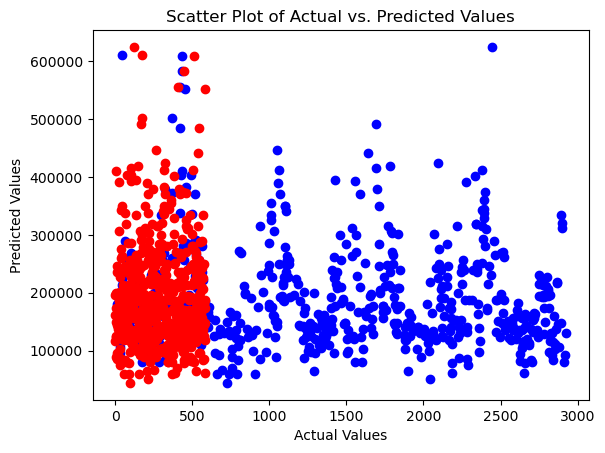

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

data = pd.read_csv('AmesHousing.csv')

data.fillna(data.mean(numeric_only=True), inplace=True)
#Вказуючи numeric_only=True, вказуємо, 
# що хочете обчислювати середнє значення лише для числових (числових) стовпців і ігнорувати нечислові стовпці.

X_single = data[['SalePrice']]  
y = data['SalePrice']  

X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

plt.plot(y_test, 'bo', label='Actual')
plt.plot(y_pred, 'ro', label='Predicted')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.show()